# Prabin Kumar Mohanta

## Task2 - Prediction Using Unsupervised ML


### 1) Here, we have to predict the optimum number of clusters and represent it visually using the given dataset.


### 2) Dataset : https://bit.ly/3kXTdox

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#improting dataset
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns={'Id'},axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.duplicated().sum()

3

In [11]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica
146,5.9,3.0,5.1,1.8,Iris-virginica


## Visualising the data

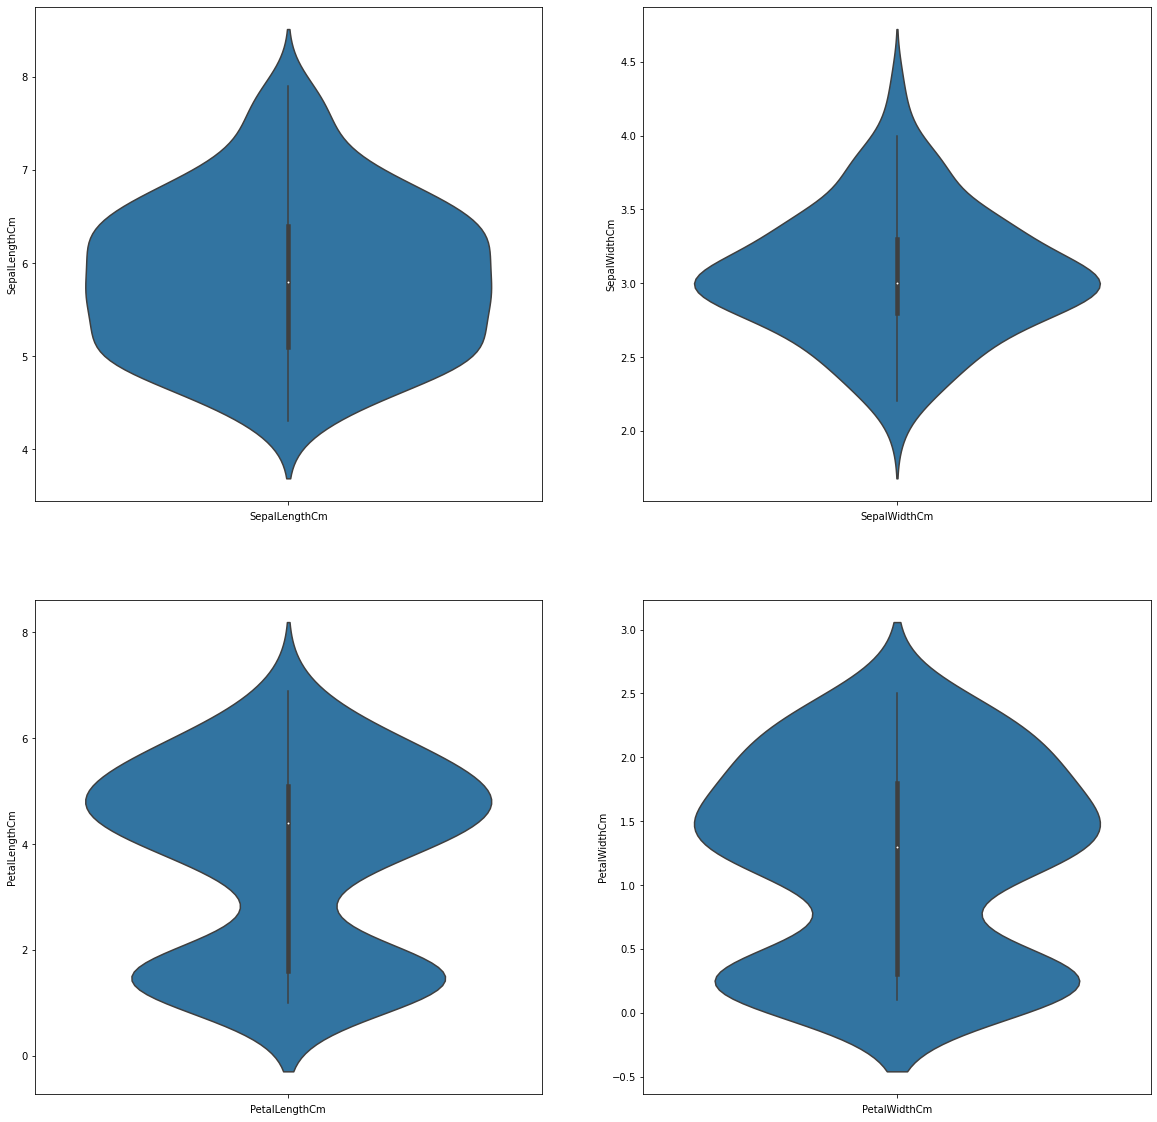

In [12]:
plt.figure(figsize=(20,20))
a=1
for i, column in enumerate(data.columns):
    if data[column].dtype != 'object':
        plt.subplot(2,2,a)
        sns.violinplot(y=data[column],orient='h')
        plt.xlabel(column)
        a+=1

plt.show()

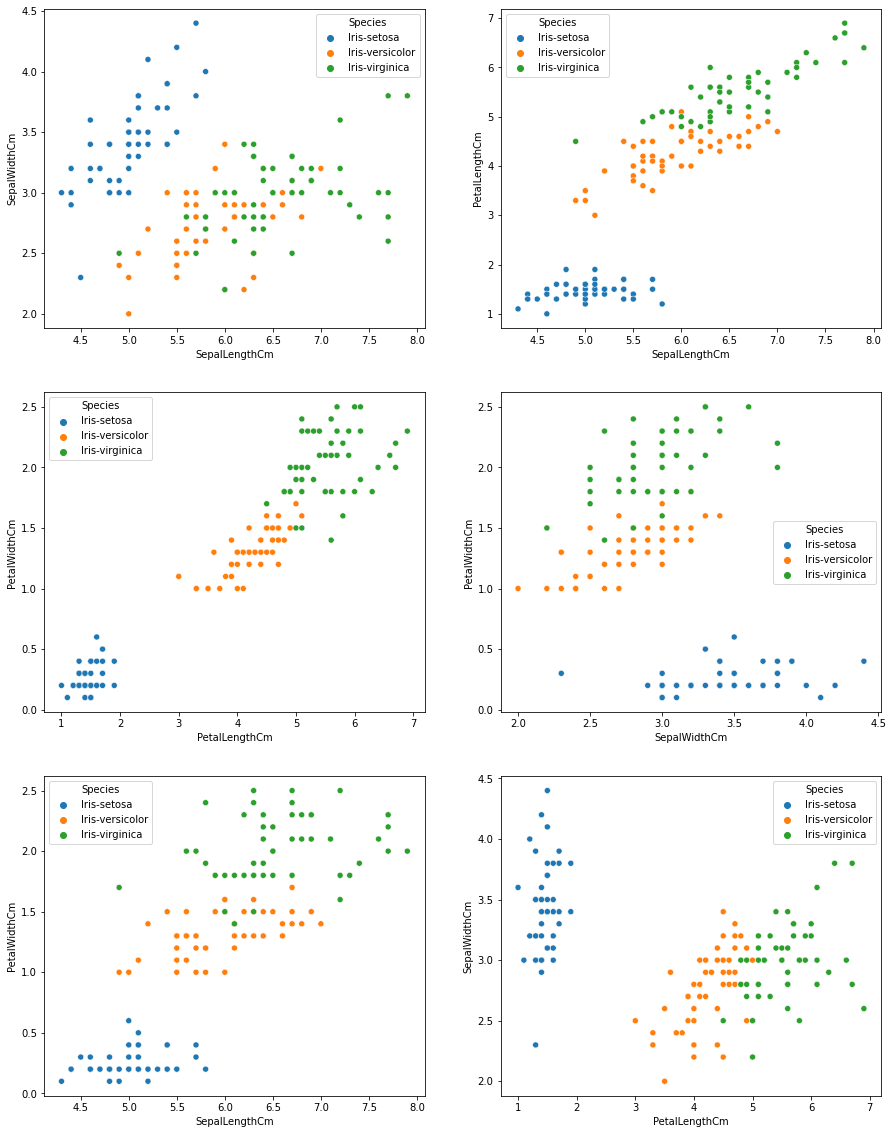

In [13]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.scatterplot(data.SepalLengthCm,data.SepalWidthCm,hue=data.Species)
plt.subplot(3,2,2)
sns.scatterplot(data.SepalLengthCm,data.PetalLengthCm,hue=data.Species)
plt.subplot(3,2,3)
sns.scatterplot(data.PetalLengthCm,data.PetalWidthCm,hue=data.Species)
plt.subplot(3,2,4)
sns.scatterplot(data.SepalWidthCm,data.PetalWidthCm,hue=data.Species)
plt.subplot(3,2,5)
sns.scatterplot(data.SepalLengthCm,data.PetalWidthCm,hue=data.Species)
plt.subplot(3,2,6)
sns.scatterplot(data.PetalLengthCm,data.SepalWidthCm,hue=data.Species)
plt.show()

In [14]:
#lebel encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Species=le.fit_transform(data.Species)

In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


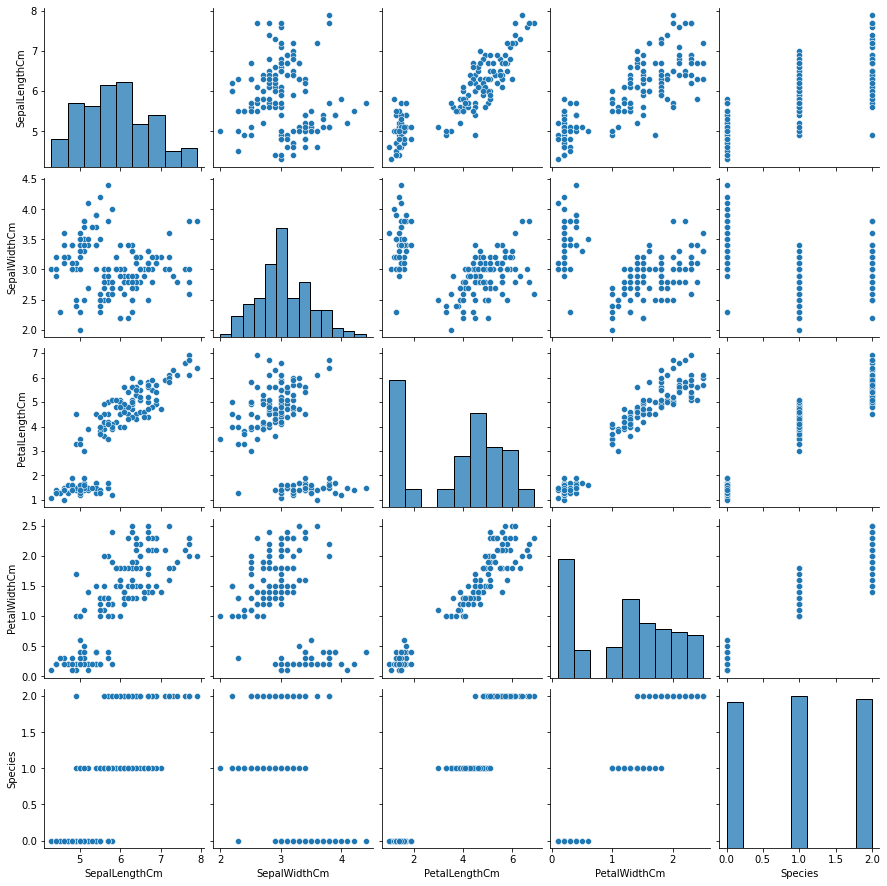

In [16]:
sns.pairplot(data)

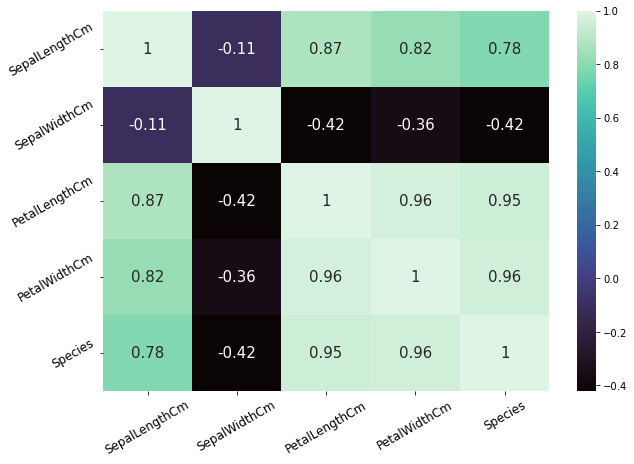

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='mako',annot_kws={'size':15})
plt.xticks(rotation=30,fontsize=12)
plt.yticks(rotation=30,fontsize=12)
plt.show()

## Finding optimum number of clusters

In [18]:
X = data.drop(columns={'Species'}).values

In [19]:
# finding wcss value for different number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

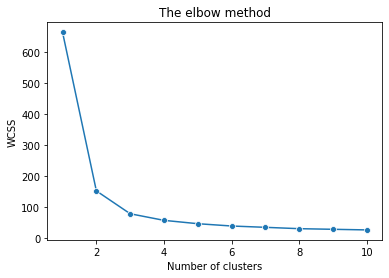

In [20]:
sns.lineplot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases and we select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

## Visualising Clusters

<AxesSubplot:>

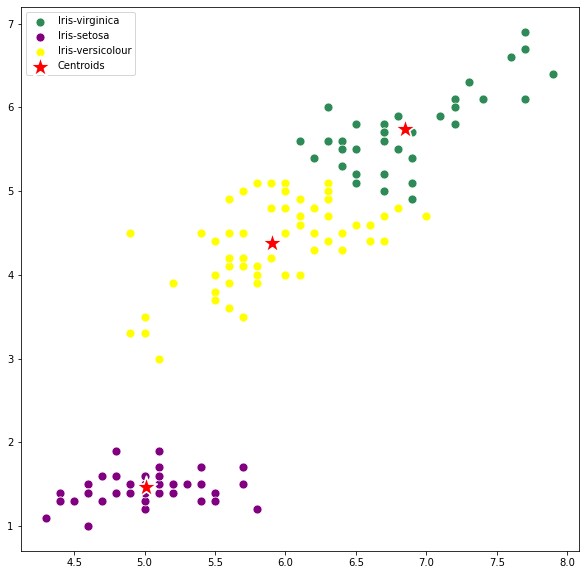

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 2], s = 80, color = 'seagreen', label = 'Iris-virginica')
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 2], s = 80, color = 'purple', label = 'Iris-setosa')
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 2], s = 80, color = 'yellow', label = 'Iris-versicolour')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 500, color = 'red',marker='*', 
                label = 'Centroids')

#### Here, we can see that predicted graph is quite similar to the actual one.